# Movie Genre Classification

# Importing libaries

In [25]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Data Preprocessing

In [26]:
train_data = pd.read_csv('train_data.txt', sep=':::', header=None, engine='python')
train_data.columns = ['Id','Title','Genre','Description']

test_data = pd.read_csv('test_data.txt', sep=':::', header=None, engine='python')
test_data.columns = ['Id','Title','Description']

solution_data = pd.read_csv('test_data_solution.txt', sep=':::', header=None, engine='python')
solution_data.columns = ['Id','Title','Genre','Description']

X_train = train_data['Description']
y_train = train_data['Genre']
X_test = test_data['Description']
y_test = solution_data['Genre']

# Feature Extraction

In [27]:
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your data
X_train = vectorizer.fit_transform(train_data['Description'])
X_test = vectorizer.transform(test_data['Description'])
y_train = train_data['Genre']
y_test = solution_data['Genre']

# Model Building

# 1)Naive Bayes

In [28]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [29]:
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f'Naive Bayes Accuracy: {nb_accuracy:.4f}')

Naive Bayes Accuracy: 0.5137


Text(95.72222222222221, 0.5, 'Actual')

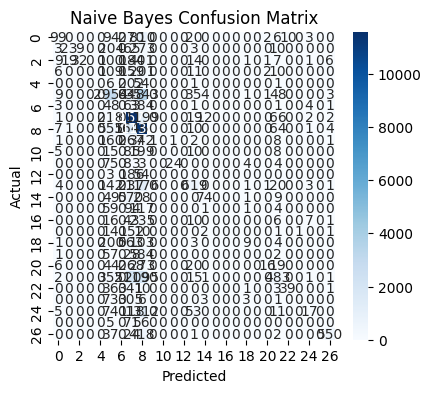

In [30]:
# Plotting Confusion Matrix for Naive Bayes

nb_cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 2)Logistic Regression

In [31]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f'Logistic Regression Accuracy: {lr_accuracy:.4f}')

Logistic Regression Accuracy: 0.5888


Text(321.26767676767673, 0.5, 'Actual')

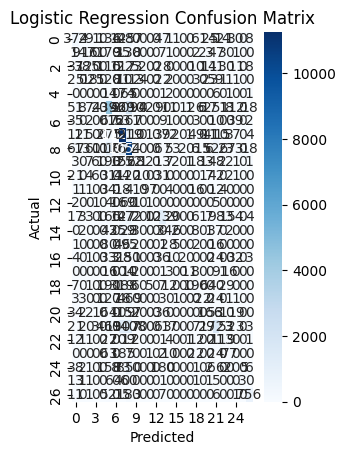

In [33]:
# Plotting Confusion Matrix for Logistic Regression

lr_cm = confusion_matrix(y_test, lr_pred)
plt.subplot(1, 2, 2)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')